# ESCI 453. Global mineral demand and supply in the 21$^{st}$ Century

## Goal

Our goal is to analyze global mineral demand and supply over coming decades, with specific focus on transition from fossil fuels to clean energy.  

* What energy technologies will exist in future?  
* What materials will they require?  
* Where will those materials be mined and processed?
* What materials might be limited by supply or/and price?

"*Today’s supply and investment plans for many critical minerals fall well short of what is needed to support an accelerated deployment of solar panels, wind turbines and electric vehicles... There is no shortage of resources worldwide, and there are sizeable opportunities for those who can produce minerals in a sustainable and responsible manner.* " IEA (2021a, foreword). 

Hardly any mineral production is sustainable, but some is responsible. The transition from fossil fuels to clean energy will need raw materials: copper, lithium, cobalt, nickel, rare-earth elements, graphite, manganese, vanadium, etc. After the transition, with a stabilizing human population, it is conceivable that we can behave sustainably and recycle most of these materials. However, before then, we need to obtain enough materials from the ground in mineral form. 

"*All stakeholders along the mineral and renewable energy supply chains have a vital role to play in the transition to a cleaner energy system to achieve [United Nations] Sustainable Development Goal 7 (Affordable and Clean Energy for All), while ensuring that it does not come at the cost of the climate, the environment, and people, particularly communities directly affected by mining activities.*" World Bank (2020, foreword).

The projected growth in demand for minerals is predicted to rise very rapidly over the next couple of decades.

![Mineral growth 2020-2040](./IEA2021_mineralGrowth.png)

**Figure 1.** IEA (2021a) mineral demand scenarios. (A) Comparisons of todays total mineral demand (excluding steel and aluminium) with the Sustainable Development Scenario (SDS), which is an IEA scenario based on meeting the UN Paris Agreement (2015), and the NZE 2050 model (IEA 2021b). (B) Ratio of 2040 demand (SDS) with 2020 production values for specific materials.


## Energy transition scenarios

**What energy technologies will exist in future and in what volume?**

Many scenarios for energy transition have been proposed. Some of the best-documented are...

* **4DS**: The world carries on with only minor improvements shifting away from fossil fuels: 4°C global temperature rise (IEA, 2016).
* **2DS**: Scenario from IEA (2017) that aims to limit global temperature rise to 2°C.
* **B2DS**: "Beyond 2-degree" scenario from IEA (2017). An effort to reach the goals of the UN Paris Agreement (2015), with climate stabilisation at “well below 2°C global temperature rise”.
* **REMAP**: An alternate scenario from IRENA (2019) to reach goals of the UN Paris Agreement (2015), with climate stabilisation at “well below 2°C global temperature rise”.
* **NZE2050**: IEA (2021b) scenario to reach global net zero greenhouse gas emissions by 2050 and limit rise in global temperatures to 1.5°C. IRENA (2021) published a similar 1.5°C scenario.
* **SDS**: IEA (2021a) scenario that relies on hitting announced (already pledged) NZE2050 net-zero emissions targets (mostly by 2050) on time and in full, which spurs the world as a whole to reach it before 2070 (an alternate scenario, but similar outcome to B2DS).
* **ESCI453**: Our own very simplified scenario that considers only solar and wind generation growth at current logistic rates into market limits defined by extrapolation of recent trends in population, wealth, and energy efficiency.

**Aim to compare our ESCI453 scenario with as many of the others as possible.**

In this notebook, we will use our energy transition model and some very over-simplified assumptions to obtain approximate estimates for the scale of the mineral supply problem. Recent publications by World Bank (2020) and IEA (2021a) provide more detailed analysis and can be used for additional research and comparisons in your report. First, let's reload and plot our scenario.

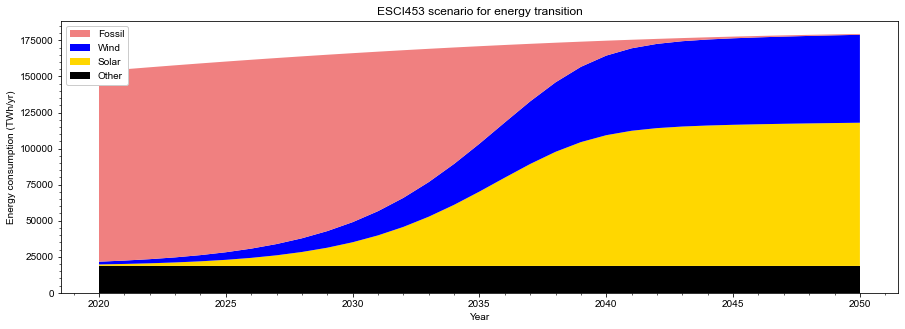

In [1]:
""" ESCI453 energy transition scenario """ 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('pdf', fonttype=42)
rc('font',size=10,family='Arial')

year = np.load('eYear.npy')
eFossil = np.load('eFossil.npy')
eSolar = np.load('eSolar.npy')
eWind = np.load('eWind.npy')
eOther = np.load('eOther.npy')

plt.figure(figsize=[15,5])

sel = (year >= 2020) & (year <= 2050)
eValues = (eOther[sel],eSolar[sel],eWind[sel],eFossil[sel])
eLabels = ('Other','Solar','Wind','Fossil')
eColors = ('black','gold','blue','lightcoral')
plt.stackplot(year[sel],eValues,labels=eLabels,colors=eColors)

plt.title('ESCI453 scenario for energy transition')
plt.legend(reversed(plt.legend().legendHandles), reversed(eLabels),
           loc='upper left', framealpha=1.0 )
plt.xlabel('Year')
plt.ylabel('Energy consumption (TWh/yr)')
plt.minorticks_on()

## Technology and innovation will impact mineral demand

**What materials will be required?**

Solar panels and windmills are growing in market share, but the precise technology determines raw material need. For example, offshore wind typically uses much larger permanent magnets than onshore wind, so requires greater amounts of neodymium. Solar panels that use crystalline silicon (c-Si) require silver in their manufacture (7% of global market in 2015), whereas second generation panels require less. Lithium-ion batteries use various combinations of lithium, nickel, cobalt, iron, aluminium, or manganese for their cathode (most use graphite for the anode). Heavier alternatives (redox-flow batteries) for stationary storage may be based on vanadium or manganese. It is impossible to predict exactly what innovations might emerge and come quickly to market. Availability and price of raw materials will surely be one factor that determines this.

To keep our calculations simple, we will use approximate numbers from IEA (2021a) (Fig. 2). Assume some hybrid model for wind.

![Mineral use in technology](./IEA2021_mineralUseTech.png)

**Figure 2.** Materials used in selected energy technologies (IEA,2021a).

Demand for some materials is predicted to increase massively, but in repsonse to just a few key technologies (e.g. lithium for batteries), whereas others (e.g. copper) are used in large quantitites for almost all clean energy technologies. This is graphically illustrated in Figure 3.

![Mineral demand risk matrix](./WorldBank2020_demandRiskMatrix.png)

**Figure 3.** Risk matrix plotting on the x axis a measure of how widely a material cross-cuts different technologies (risk of being relevant) versus on the y axis how much demand is predicted in 2050 (2DS scenario), relative to total 2018 global production (risk of being able to increase supply) (World Bank, 2020).


## ESCI453 Scenario: implications for mineral demand

### Battery storage

Let us assume 4 hours of storage, on average, is needed to smooth supply and demand issues of power delivery before consumption. Hence, it is easy to calculate the amount of storage needed (below). Note that this is much more than is currently being installed, because supply-demand issues are typically managed using other generation methods (e.g. gas or coal power), but this will soon become impractical (we already saw the effects of this in NZ: rolling blackouts, August 2021).

**Add to the code below, to calculate the quantities of materials needed for battery storage.**
Assume similar material proportions (Li:Co:Ni:Mn:Cu) to that in an electric car (10:15:40:25:55) with Li amounts of 150 kg/MWh or ~10 kg in an electric car (Fig. 2). You could also calculate the total materials needed for automotive transition (a previous notebook).

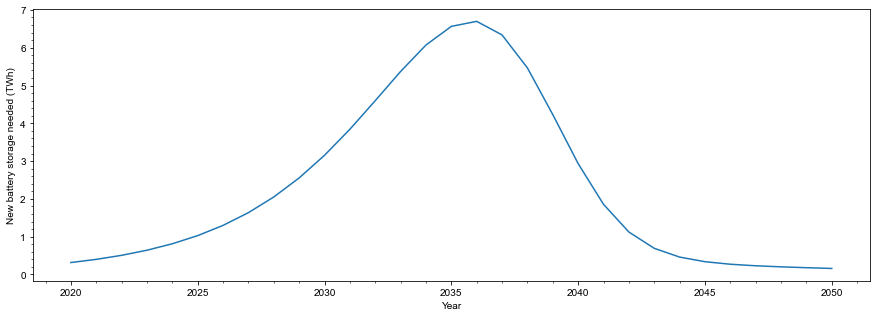

In [2]:
''' 
Assume 4 hours of storage, on average is needed to smooth supply
and demand issues of power delivery before consumption
'''
storageNeededTWh = (eSolar + eWind) * 4 / (365.25 * 24)
newStorageNeededTWh = np.gradient(storageNeededTWh)
np.save('newStorageNeededTWh.npy',newStorageNeededTWh)

plt.figure(figsize=[15,5])
plt.plot(year[sel],newStorageNeededTWh[sel])
plt.xlabel('Year')
plt.ylabel('New battery storage needed (TWh)')
plt.minorticks_on()

### Solar and wind capacity

**Add to the code below to calculate the approximate quantities of raw materials required to install new solar and wind generation capacity**  
Use Fig. 2 and assume that solar PV installations also use silver (Ag) at 60 kg/MW. Silver is used in solar PV panels for its high electrical conductivity and resistance to oxidation. Note: you can do your own research and speculate about trace elements that might be used in solar panels in future. Elements such as indium, gallium, sellenium, etc.

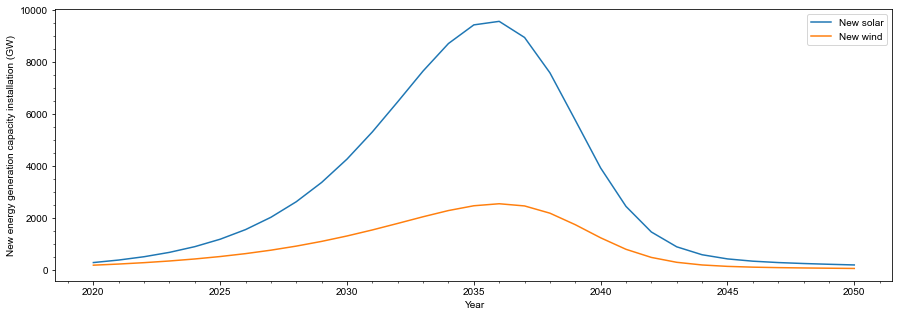

In [3]:
'''
Analysis of IRENA generation and production data shows: 
solar photovoltaic production of 1.0 TWh/yr for every 1 GW of installed capacity; and
wind energy produces 2.0 TWh/yr for every 1 GW of capacity installed.
'''
newSolarInstallationGW = np.gradient(eSolar) / 1.0 
newWindInstallationGW = np.gradient(eWind) / 2.0 
np.save('newSolarInstallationGW.npy',newSolarInstallationGW)
np.save('newWindInstallationGW.npy',newWindInstallationGW)

plt.figure(figsize=[15,5])
plt.plot(year[sel],newSolarInstallationGW[sel],label='New solar')
plt.plot(year[sel],newWindInstallationGW[sel],label='New wind')
plt.xlabel('Year')
plt.ylabel('New energy generation capacity installation (GW)')
plt.legend()
plt.minorticks_on()

### Mineral production, prices, processing and security

**Compare your results with statistics of production, reserves, prices, and countries of origin and processing.**  
https://www.usgs.gov/centers/nmic/commodity-statistics-and-information  
You can generate and compare cost curves (2020-2050) for each commodity using your analysis above. Assume 2019 prices persist (unlikely but simple).

**What materials might be cost barriers?  
What materials might have limited supply (small reserves compared to requirement)? Might they exist elsewhere?**  
Consider possible mineral occurrences (for elements mentioned above) in other countries, based on your knowledge of geology and the composition of continental crust (e.g. see Taylor & McLennan, 1995). Where might be prospective?  
Consider construction of some alternate formulations of risk matrix (cross plot c.f. Fig. 3) for this scenario, e.g. (2035/2019 production) against (production 2040-2019)/(proven reserves in 2019).  
Compare the ESCI453 scenario with scenarios of World Bank (2020) and IEA (2021a).

A small number of countries currently dominate global mineral production and especially processing. Rich countries don't like mining or processing minerals, due to public environmental concerns. Is this going to be a problem in future? Might security of supply of key elements be an issue for countries that currently enjoy high levels of wealth and international influence? Compare the situation of fossil fuels (e.g. the roles of USA and Russia in the Middle East) with that of minerals (e.g. the current role of China and other countries that have lower-than-average GDP/capita). Fossil fuels have been a source of intense geopolitical wrangling since World Wars I and II, because fossil fuels have such military and economic strategic significance. Surely this type of politics is likely to re-appear as we go through this energy transition? Discuss which countries might be key ones in future. Are minerals really just focussed in a few countries, or could their supply chains be diversified easily? If so, what actions or changes in attitude might rich countries adopt?

![Mineral production and processing countries](./IEA2021_mineralPlaces.png)

**Figure 4.** Share of the top three (A) producers and (B) processors of fossil fuels and key minerals in 2019 (IEA, 2021a).


## References

IEA (International Energy Agency) (2016). Energy Technology Perspectives 2016, IEA, Paris  
https://www.iea.org/reports/energy-technology-perspectives-2016

IEA (2017). Energy Technology Perspectives (2017). IEA, Paris  
https://www.iea.org/reports/energy-technology-perspectives-2017

IEA (2021a). The Role of Critical Minerals in Clean Energy Transitions. 287 pages. In: World Energy Outlook 2021.  
https://www.iea.org/reports/the-role-of-critical-minerals-in-clean-energy-transitions

IEA (2021b). Net Zero by 2050, IEA, Paris. 224 pages.  
https://www.iea.org/reports/net-zero-by-2050  
https://iea.li/nzedata  

IRENA (International Renewable Energy Agency) (2019). Global Energy Transformation: A Roadmap to 2050. Abu Dhabi: IRENA.  
https://www.irena.org/publications/2019/Apr/Global-energy-transformation-A-roadmap-to-2050-2019Edition

IRENA (2021). World Energy Transitions Outlook: 1.5°C Pathway, International Renewable Energy
Agency, Abu Dhabi.  
https://www.irena.org/publications/2021/Jun/World-Energy-Transitions-Outlook

Taylor, S. R., & McLennan, S. M. (1995). The geochemical evolution of the continental crust. Reviews of geophysics, 33(2), 241-265.

World Bank (2020). Minerals for Climate Action: The Mineral Intensity of the Clean Energy Transition. 112 pages.  
https://pubdocs.worldbank.org/en/961711588875536384/Minerals-for-Climate-Action-The-Mineral-Intensity-of-the-Clean-Energy-Transition.pdf
